In [4]:
import sys 
sys.path.insert(0,"/Users/anis/test_labnbook/test_3_indicateurs/comparaison")
#from utiles import * 
import pandas as pd 

In [5]:
data_full = pd.read_csv(
    "/Users/anis/test_labnbook/test_3_indicateurs/comparaison/ADD_Labnbook_new_indicators/data.csv", index_col=[0])
# X = data_full.drop(["id_labdoc"],axis = 1 ).copy()
X = data_full.copy()
indicators = X[["co_ecriture",	"co_ecriture_sans_ponderation",
                "co_ecriture_dispersion"]]


In [18]:
data_full.describe()

,id_labdoc,n_users,n_mots,equilibre_contribution,co_ecriture,co_ecriture_sans_ponderation,co_ecriture_dispersion,durée_écriture,plage_travail,passage_main
count,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000
mean,365809.029884,2.225307,129.253146,0.519487,0.298624,0.265834,0.353696,619.227745,97208.007864,1.780434
std,77933.395539,0.491652,93.832753,0.313877,0.264032,0.253554,0.301984,437.278612,152397.599652,1.252256
min,200124.000000,2.000000,16.000000,0.000036,0.000000,0.000000,0.000000,40.000000,84.000000,1.000000
25%,291266.000000,2.000000,57.000000,0.250933,0.068478,0.061602,0.101693,280.000000,3088.750000,1.000000
50%,366580.500000,2.000000,102.000000,0.533395,0.233343,0.187437,0.271451,500.000000,12454.000000,1.000000
75%,441369.750000,2.000000,176.000000,0.790220,0.471736,0.408451,0.544159,840.000000,123442.750000,2.000000
max,481735.000000,8.000000,461.000000,1.000000,1.000000,1.000000,1.000000,2100.000000,656819.000000,20.000000


In [6]:
data_full.head()

,id_labdoc,n_users,n_mots,equilibre_contribution,co_ecriture,co_ecriture_sans_ponderation,co_ecriture_dispersion,durée_écriture,plage_travail,passage_main
1,325259,2,180.0,0.947732,0.616471,0.606979,0.656825,1280.0,215938.0,1
6,325265,2,25.0,0.321024,0.287573,0.346311,0.486438,140.0,351.0,1
8,328216,2,106.0,0.998316,0.332558,0.219437,0.255231,800.0,3577.0,1
12,325263,2,104.0,0.530316,0.484330,0.458482,0.606283,700.0,93798.0,1
14,322170,2,45.0,0.035240,0.035240,0.035240,0.069237,120.0,3238.0,2


In [19]:
X.columns

Index(['id_labdoc', 'n_users', 'n_mots', 'equilibre_contribution', 'co_ecriture', 'co_ecriture_sans_ponderation', 'co_ecriture_dispersion', 'durée_écriture', 'plage_travail', 'passage_main'], dtype='object')

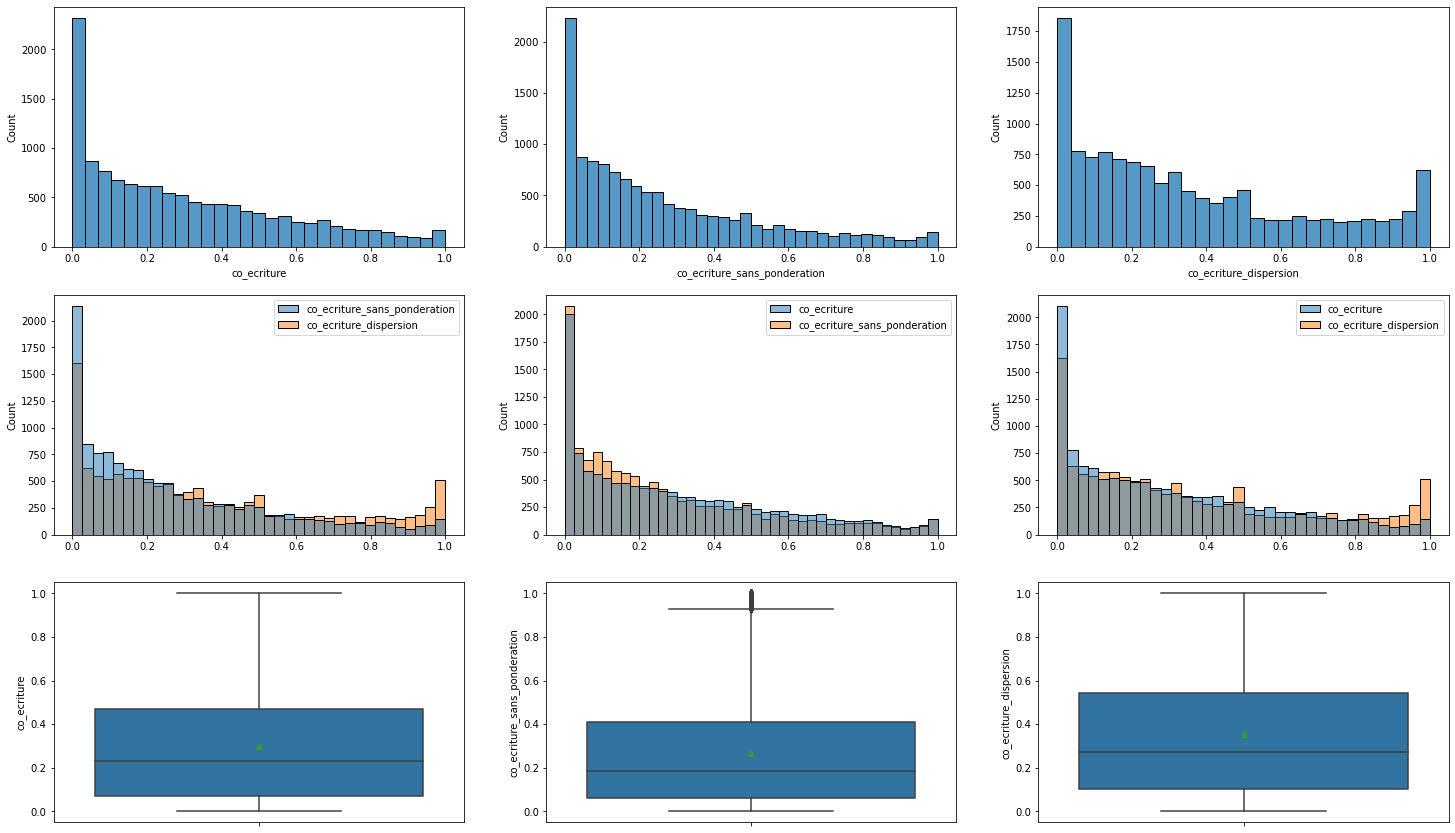

In [3]:
fig, ax = plt.subplots(3,3, figsize=(25,15))
for i,name in enumerate(indicators):
    sns.histplot( indicators[name], ax=ax[0, i])
    if i==0:
        sns.histplot([indicators["co_ecriture_sans_ponderation"],
                     indicators["co_ecriture_dispersion"]], ax=ax[1, i])
    else : 
        sns.histplot([indicators["co_ecriture"],
                     indicators[name]], ax=ax[1, i])
    sns.boxplot(y= indicators[name], orient="v",showmeans=True, ax=ax[2, i])


* La moyenne est les quartiles de l'indicateur co_écriture_dispersion sont plus grandes que les autres 
* Co_écriture_dispersion donner des valeurs plus grande que les autres.

In [4]:
X.n_mots.describe()

count    12716.000000
mean       129.253146
std         93.832753
min         16.000000
25%         57.000000
50%        102.000000
75%        176.000000
max        461.000000
Name: n_mots, dtype: float64

# Indicateurs pour les grands labdocs 

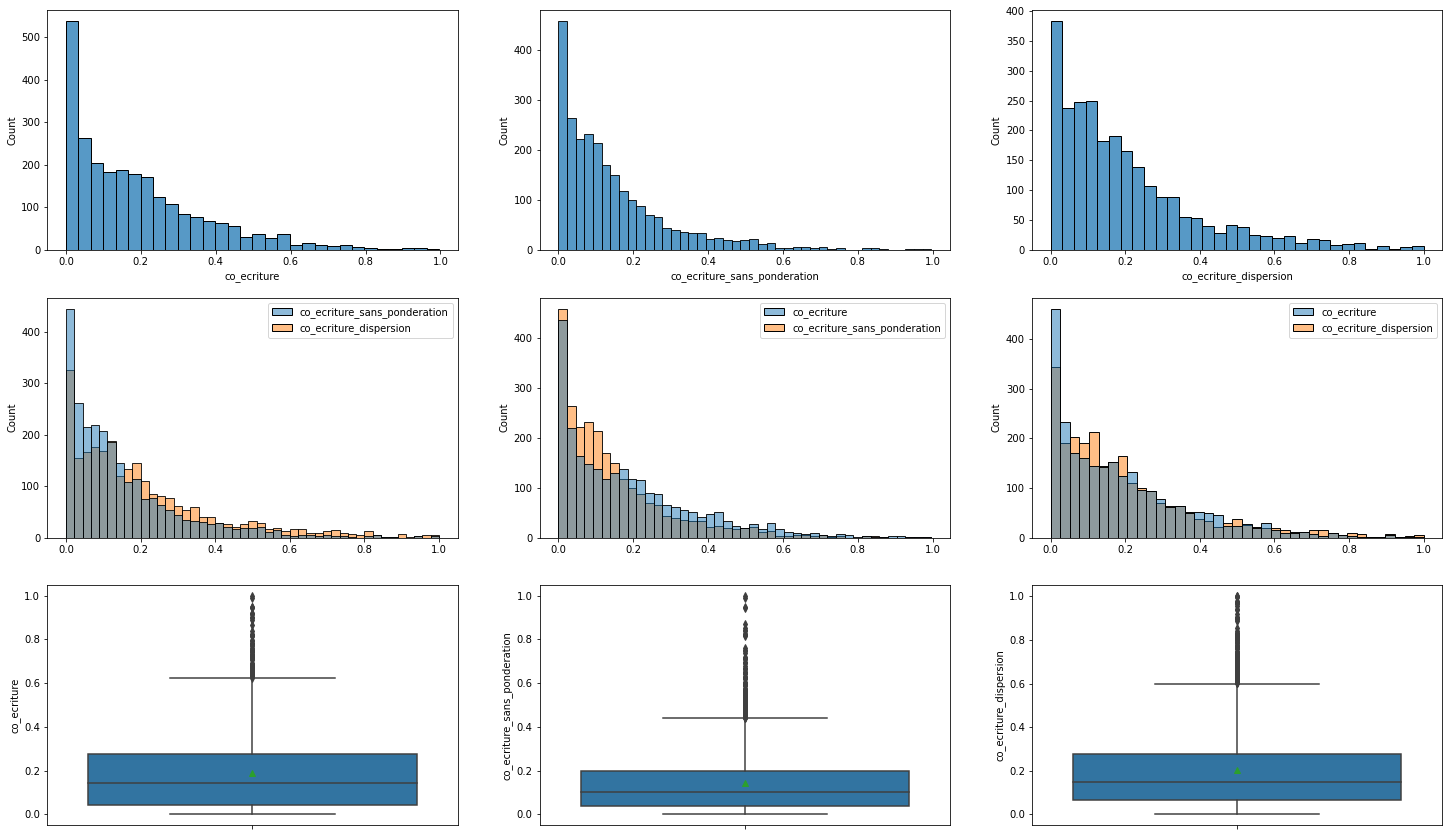

In [5]:
df = X[X.n_mots > 200]
fig, ax = plt.subplots(3, 3, figsize=(25, 15))
for i, name in enumerate(indicators):
    sns.histplot(df[name], ax=ax[0, i])
    if i == 0:
        sns.histplot([df["co_ecriture_sans_ponderation"],
                     df["co_ecriture_dispersion"]], ax=ax[1, i])
    else:
        sns.histplot([df["co_ecriture"],
                     df[name]], ax=ax[1, i])
    sns.boxplot(y=df[name], orient="v", showmeans=True, ax=ax[2, i])


In [6]:
df[["n_mots","equilibre_contribution","co_ecriture","co_ecriture_sans_ponderation","co_ecriture_dispersion"]].describe()

,n_mots,equilibre_contribution,co_ecriture,co_ecriture_sans_ponderation,co_ecriture_dispersion
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,285.699206,0.497441,0.188655,0.145031,0.201393
std,66.068744,0.307379,0.178679,0.148598,0.189800
min,201.000000,0.000059,0.000000,0.000000,0.000000
25%,232.000000,0.235540,0.043412,0.038399,0.064111
50%,270.000000,0.507410,0.144958,0.101053,0.148397
75%,330.000000,0.746980,0.275424,0.199055,0.277296
max,461.000000,1.000000,0.996225,0.996225,0.999986


* L'indicateur co_ecriture_dispersion est plus grand en moyenne sur les grands LD comparé aux autres indicateurs


In [7]:
#sns.heatmap(df[["n_mots","equilibre_contribution","co_ecriture","co_ecriture_sans_ponderation","co_ecriture_dispersion"]].corr(),annot=True)

# Classification 

## co_ecriture_dispersion

In [8]:
# Créer un nouveau dataframe pour l'indicateur co_ecriture_dispersion
X_dispersion = X[['n_users', 'n_mots',
                  'equilibre_contribution', "co_ecriture_dispersion", "durée_écriture", "plage_travail", "passage_main"]]
# Créer une colonne vide pour les nouveaux labels
X_dispersion["labels_ArbreDecision"] = np.nan
ArbreDecision(X_dispersion, "equilibre_contribution", "co_ecriture_dispersion",
              SeuilBalContr=(0, .33, .66, 1), SeuilCoEcri=(0, .33, .66, 1))


In [9]:
gb = X_dispersion.groupby("labels_ArbreDecision")
result = pd.DataFrame(gb.mean())
result["freq %"] = gb.size() / np.shape(X_dispersion)[0] * 100
result.append(X_dispersion.drop("labels_ArbreDecision",
              axis=1).mean(), ignore_index=True)
# # La dernière ligne est la moyenne sur tout le dataset
result


,n_users,n_mots,equilibre_contribution,co_ecriture_dispersion,durée_écriture,plage_travail,passage_main,freq %
labels_ArbreDecision,,,,,,,,
0,2.147892,139.769277,0.104922,0.115834,622.006024,109596.758434,1.588855,26.108839
1,2.189139,81.286517,0.255392,0.426182,471.161049,78050.378277,1.636704,4.199434
3,2.154719,178.628675,0.488872,0.149826,695.358432,94842.130995,1.729242,15.248506
4,2.259106,110.173841,0.483864,0.478742,578.377483,96629.763245,1.701987,9.499843
5,2.294903,63.552184,0.542169,0.769976,416.650485,82009.678398,1.716019,6.480025
6,2.199486,163.522879,0.852787,0.138748,739.866324,87837.124422,1.954242,15.295690
7,2.281832,127.656832,0.844978,0.477355,700.791925,103089.649068,2.030280,10.128971
8,2.401689,73.492159,0.841315,0.903173,497.876960,95736.183353,1.961399,13.038691


* On a des nouveaux clusters (1 et 5) par rapport à la co-écriture 

<AxesSubplot:xlabel='co_ecriture_dispersion', ylabel='equilibre_contribution'>

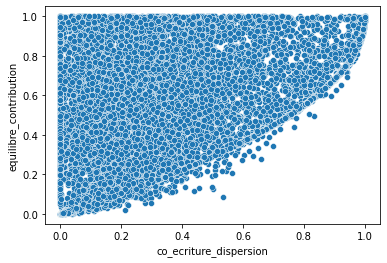

In [10]:
sns.scatterplot(y="equilibre_contribution",x="co_ecriture_dispersion",data=X_dispersion)

<AxesSubplot:xlabel='co_ecriture_dispersion', ylabel='equilibre_contribution'>

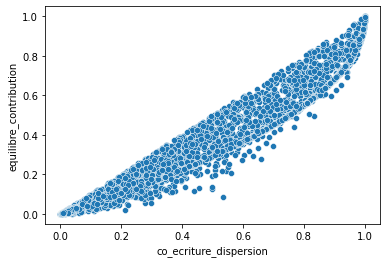

In [11]:
sns.scatterplot(y="equilibre_contribution", x="co_ecriture_dispersion", data=X_dispersion[X_dispersion.co_ecriture_dispersion > X_dispersion.equilibre_contribution])


In [12]:
# X_dispersion[X_dispersion.co_ecriture_dispersion >
#              X_dispersion.equilibre_contribution ]
X_dispersion.query(
    'co_ecriture_dispersion > equilibre_contribution & passage_main == 1 ').describe()


,n_users,n_mots,equilibre_contribution,co_ecriture_dispersion,durée_écriture,plage_travail,passage_main,labels_ArbreDecision
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.0,3445.000000
mean,2.073730,89.903048,0.343242,0.449721,452.568940,88493.112627,1.0,2.784615
std,0.272252,74.212896,0.307333,0.347919,358.401149,143465.767218,0.0,3.181327
min,2.000000,16.000000,0.000495,0.000650,40.000000,84.000000,1.0,0.000000
25%,2.000000,38.000000,0.065859,0.118205,200.000000,2231.000000,1.0,0.000000
50%,2.000000,66.000000,0.256079,0.383399,340.000000,9799.000000,1.0,1.000000
75%,2.000000,114.000000,0.574219,0.785322,600.000000,102985.000000,1.0,5.000000
max,4.000000,460.000000,0.999999,1.000000,2100.000000,646682.000000,1.0,8.000000


## co_ecriture_sans_ponderation

In [13]:
# Créer un nouveau dataframe pour l'indicateur co_ecriture_dispersion
X_sans_ponderation = X[['n_users', 'n_mots',
                        'equilibre_contribution', "co_ecriture_sans_ponderation", "durée_écriture", "plage_travail", "passage_main"]]
# Créer une colonne vide pour les nouveaux labels
X_sans_ponderation["labels_ArbreDecision"] = np.nan
ArbreDecision(X_sans_ponderation, "equilibre_contribution", "co_ecriture_sans_ponderation",
              SeuilBalContr=(0, .33, .66, 1), SeuilCoEcri=(0, .33, .66, 1))

gb = X_sans_ponderation.groupby("labels_ArbreDecision")
result = pd.DataFrame(gb.mean())
result["freq %"] = gb.size() / np.shape(X_sans_ponderation)[0] * 100
result.append(X_sans_ponderation.drop("labels_ArbreDecision",
              axis=1).mean(), ignore_index=True)
# # La dernière ligne est la moyenne sur tout le dataset
result


,n_users,n_mots,equilibre_contribution,co_ecriture_sans_ponderation,durée_écriture,plage_travail,passage_main,freq %
labels_ArbreDecision,,,,,,,,
0,2.153786,132.020959,0.124426,0.093752,601.556196,104850.147498,1.596804,30.017301
1,2.135135,95.054054,0.264529,0.385394,554.594595,143976.405405,1.459459,0.290972
3,2.181343,166.666265,0.487394,0.143024,674.443104,96062.333333,1.736630,19.558037
4,2.274763,79.056988,0.516315,0.470745,479.715061,87530.801900,1.689281,11.591696
5,2.000000,78.900000,0.597886,0.709346,586.000000,27619.600000,1.400000,0.078641
6,2.211303,158.956558,0.851096,0.133137,732.956558,89511.398988,1.980599,18.645801
7,2.351613,118.991935,0.838564,0.472387,686.467742,105805.321774,2.022581,9.751494
8,2.375000,62.412500,0.846982,0.820416,451.625000,92908.703906,1.925000,10.066059


<AxesSubplot:xlabel='co_ecriture_sans_ponderation', ylabel='equilibre_contribution'>

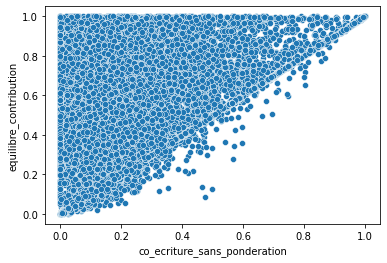

In [14]:
sns.scatterplot(y="equilibre_contribution",x="co_ecriture_sans_ponderation",data=X_sans_ponderation)

<AxesSubplot:xlabel='co_ecriture_sans_ponderation', ylabel='equilibre_contribution'>

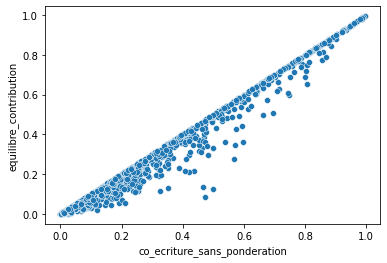

In [15]:
sns.scatterplot(y="equilibre_contribution", x="co_ecriture_sans_ponderation",
                data=X_sans_ponderation[X_sans_ponderation.co_ecriture_sans_ponderation > X_sans_ponderation.equilibre_contribution])


In [29]:
## Comparaison des indicateurs 

In [44]:
data_full[data_full.co_ecriture !=0].co_ecriture

1        0.616471
6        0.287573
8        0.332558
12       0.484330
14       0.035240
           ...   
20238    0.076776
20239    0.162382
20240    0.028818
20241    0.070637
20242    0.060129
Name: co_ecriture, Length: 11955, dtype: float64

<AxesSubplot:xlabel='co_ecriture', ylabel='co_ecriture_sans_ponderation'>

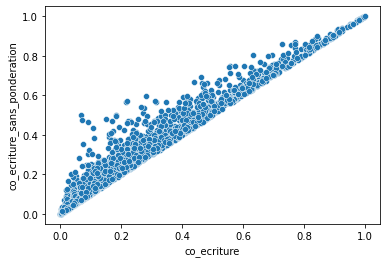

In [51]:

sns.scatterplot(x="co_ecriture",
                y="co_ecriture_sans_ponderation", data=data_full.query('co_ecriture < co_ecriture_sans_ponderation ')
                )


## Comparaison 
### co_ecriture_sans_ponderation

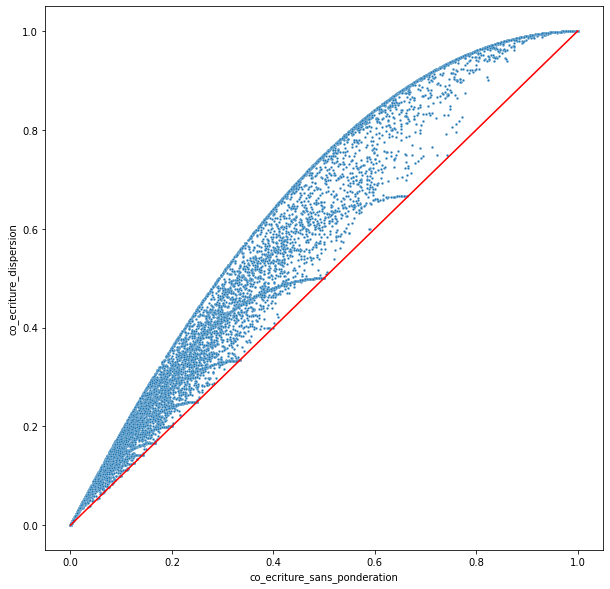

In [89]:
plt.figure(figsize=(10, 10))

sns.scatterplot(y="co_ecriture_dispersion",
                x="co_ecriture_sans_ponderation", data=data_full,s=6
                )


sns.lineplot(y="co_ecriture_sans_ponderation",
             x="co_ecriture_dispersion", data=data_full.query("co_ecriture_dispersion == co_ecriture_sans_ponderation "), color="r")
plt.show()


* Co-écriture sans pondération  est toujours plus petit que co-écriture dispersion 

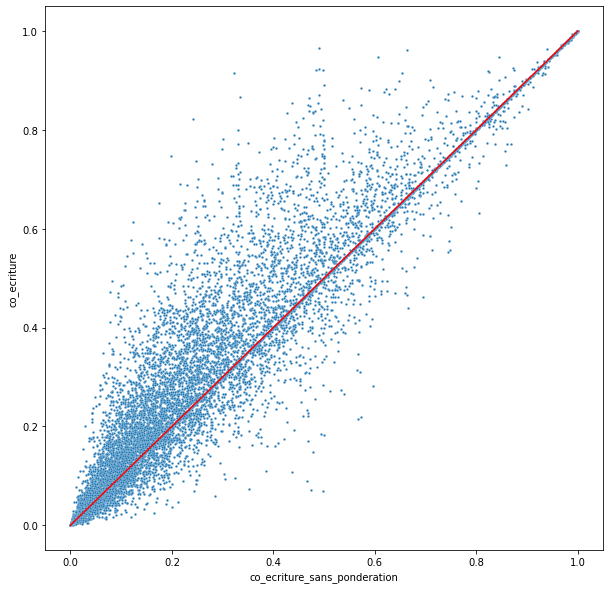

In [86]:
plt.figure(figsize=(10, 10))

sns.scatterplot(y="co_ecriture",
                x="co_ecriture_sans_ponderation", data=data_full, s=6
                )

sns.lineplot(y="co_ecriture",
                x="co_ecriture_sans_ponderation", data=data_full.query("co_ecriture == co_ecriture_sans_ponderation " ),color="r")
plt.show()

* Co-écriture sans pondération est majoritairement plus petit que co-écriture

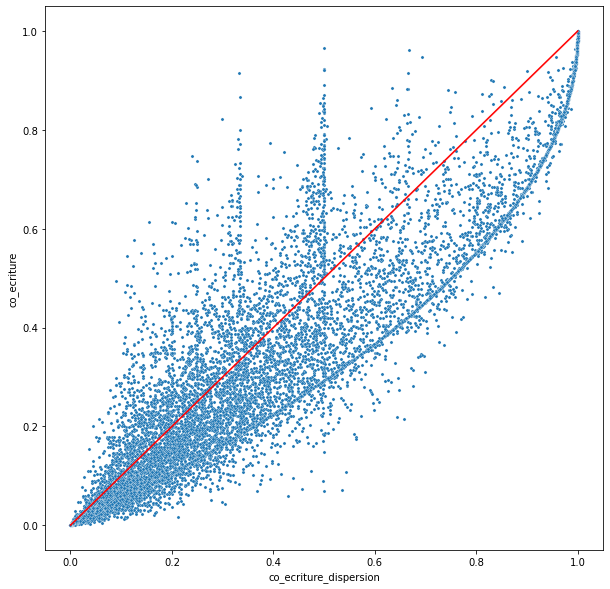

In [84]:
plt.figure(figsize=(10, 10))

sns.scatterplot(y="co_ecriture",
                x="co_ecriture_dispersion", data=data_full,s=10
                )
sns.lineplot(y="co_ecriture",
                x="co_ecriture_dispersion", data=data_full.query("co_ecriture == co_ecriture_dispersion " ),color="r")
plt.show()

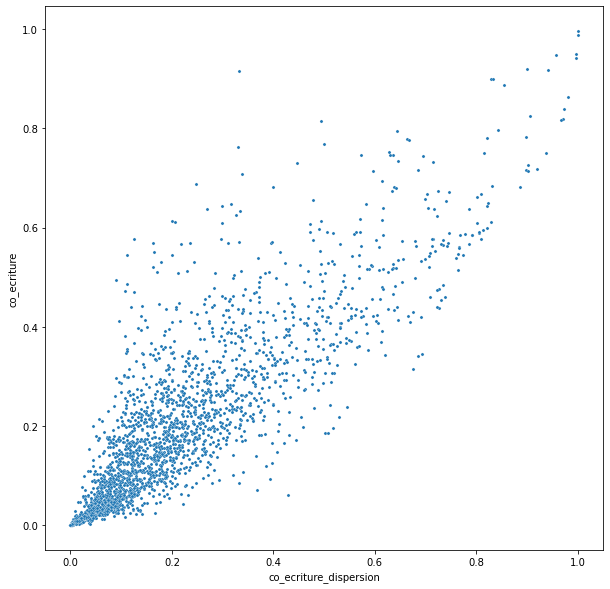

In [90]:
df = X[X.n_mots > 200]
plt.figure(figsize=(10, 10))

sns.scatterplot(y="co_ecriture",
                x="co_ecriture_dispersion", data=df, s=10
                )
sns.lineplot(y="co_ecriture",
             x="co_ecriture_dispersion", data=df.query("co_ecriture == co_ecriture_dispersion "), color="r")
plt.show()
